# CITEC Tecnical Test

In [74]:
#Libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Download data
online_retail = fetch_ucirepo(id=352)

## Exploring data structure

In [3]:
#Exploring data structure
print(f'Type of online_retail: {type(online_retail)}')
print(f'Keys: {online_retail.keys()}')

Type of online_retail: <class 'ucimlrepo.dotdict.dotdict'>
Keys: dict_keys(['data', 'metadata', 'variables'])


### Metadata

In [4]:
metadata = online_retail.metadata
metadata

{'uci_id': 352,
 'name': 'Online Retail',
 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail',
 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv',
 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.',
 'area': 'Business',
 'tasks': ['Classification', 'Clustering'],
 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'],
 'num_instances': 541909,
 'num_features': 6,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': None,
 'index_col': ['InvoiceNo', 'StockCode'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2015,
 'last_updated': 'Fri Jan 05 2024',
 'dataset_doi': '10.24432/C5BW33',
 'creators': ['Daqing Chen'],
 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation usin

### Variables

In [5]:
variables = online_retail.variables
variables

,name,role,type,demographic,description,units,missing_values
0,InvoiceNo,ID,Categorical,None,a 6-digit integral number uniquely assigned to...,None,no
1,StockCode,ID,Categorical,None,a 5-digit integral number uniquely assigned to...,None,no
2,Description,Feature,Categorical,None,product name,None,no
3,Quantity,Feature,Integer,None,the quantities of each product (item) per tran...,None,no
4,InvoiceDate,Feature,Date,None,the day and time when each transaction was gen...,None,no
5,UnitPrice,Feature,Continuous,None,product price per unit,sterling,no
6,CustomerID,Feature,Categorical,None,a 5-digit integral number uniquely assigned to...,None,no
7,Country,Feature,Categorical,None,the name of the country where each customer re...,None,no


In [40]:
variables.iloc[0]['description']

"a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation"

### Data

In [7]:
#Exploring data
print(f'Type of data key: {type(online_retail.data)}')
print(f'Keys: {online_retail.data.keys()}')
data = online_retail.data

Type of data key: <class 'ucimlrepo.dotdict.dotdict'>
Keys: dict_keys(['ids', 'features', 'targets', 'original', 'headers'])


#### Ids

In [8]:
ids = data.ids
ids

,InvoiceNo,StockCode
0,536365,85123A
1,536365,71053
2,536365,84406B
3,536365,84029G
4,536365,84029E
...,...,...
541904,581587,22613
541905,581587,22899
541906,581587,23254
541907,581587,23255


#### Features

In [9]:
features = data.features
features

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Target

In [10]:
target = data.targets
target

#### Original

In [11]:
original = data.original
original

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Headers

In [12]:
headers = data.headers
headers

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### Exploring Data 

By looking at the information in the repository, it is known that there are two dataframes. The first dataframe is the original, and the second one contains only the features. However, it will be checked if the information in one matches the other, in order to work with just one, or to determine if an additional step is necessary.

In [13]:
if original[['Description', 'Quantity','InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']].equals(features):
    print("Data is equal")
else:
    print("Data is not equal")

Data is equal


In the results, it can be observed that the data are identical in both dataframes. However, the original dataframe will be used to conduct the exploratory data analysis

## Exploratory Data Analysis (EDA)

The exploratory analysis begins by verifying the variables that exist and if all the data is complete

In [14]:
#Deleting spaces on str variables
original['InvoiceNo'] = original['InvoiceNo'].str.strip()
original['StockCode'] = original['StockCode'].str.strip()
original['Description'] = original['Description'].str.strip()
original['Country'] = original['Country'].str.strip()

#Create a copy of the dataframe
original_copy = original.copy()

In [15]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


It can be observed that there are 1,454 records without a description. However, according to the documentation, it is known that this description refers to the product name, which is associated with a unique product code that we will use to complete the fields.

In [16]:
#Get null data associated to Description column
null_data = original[original['Description'].isnull()]
null_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [17]:
#Get the unique stock codes that exist
unique_stock_codes = original['StockCode'].nunique()
print(f"Total of different StockCodes: {unique_stock_codes}")

Total of different StockCodes: 4070


In [18]:
#Creating a dictionary with the stock codes related to the description or product name
stockcode_to_description = original.dropna(subset=['Description']).drop_duplicates('StockCode').set_index('StockCode')['Description'].to_dict()

In [19]:
print(f'Total different StockCode by description: {len(stockcode_to_description)}')

Total different StockCode by description: 3958


In [20]:
#Complete the Description data
original['Description'] = original.apply(
    lambda row: stockcode_to_description.get(row['StockCode']) if pd.isnull(row['Description']) else row['Description'],
    axis=1
)

In [21]:
row_by_index_value = original.loc[1971]
row_by_index_value

InvoiceNo                              536546
StockCode                               22145
Description    CHRISTMAS CRAFT HEART STOCKING
Quantity                                    1
InvoiceDate                   12/1/2010 14:33
UnitPrice                                 0.0
CustomerID                                NaN
Country                        United Kingdom
Name: 1971, dtype: object

In [22]:
filtered_rows = original[original['StockCode'] == '22145']
print(filtered_rows)

      InvoiceNo StockCode                     Description  Quantity  \
1971     536546     22145  CHRISTMAS CRAFT HEART STOCKING         1   
19025    537827     22145  CHRISTMAS CRAFT HEART STOCKING        30   
20392    538041     22145  CHRISTMAS CRAFT HEART STOCKING        30   

           InvoiceDate  UnitPrice  CustomerID         Country  
1971   12/1/2010 14:33        0.0         NaN  United Kingdom  
19025  12/8/2010 14:43        2.1     15332.0       Lithuania  
20392  12/9/2010 13:09        0.0         NaN  United Kingdom  


In [23]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541797 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Some data in the 'Description' column has already been completed. Now, the missing data in the 'CustomerID' column will be addressed.
To attempt to complete the CustomerID data, the approach will be to use records with the same InvoiceNo that do have a CustomerID to fill in the missing values.

In [24]:
#Creating a dictionary with the InvoiceNo
invoice_to_customer = original.dropna(subset=['CustomerID']).drop_duplicates('InvoiceNo').set_index('InvoiceNo')['CustomerID'].to_dict()

In [25]:
#Complete the customerID based on the InvoiceNo
def fill_customer_id(row):
    if pd.isnull(row['CustomerID']):
        return invoice_to_customer.get(row['InvoiceNo'])
    else:
        return row['CustomerID']

original['CustomerID'] = original.apply(fill_customer_id, axis=1)

In [26]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541797 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Given that there are values that could not be completed with the executed strategy, they will be removed as the intention is to perform an analysis of customer behavior over time. Since this data is missing, it will not be possible to find relationships with other records, which would only introduce a significant bias.

In [27]:
original.dropna(subset=['CustomerID'], inplace=True)

In [28]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


The analysis of the variables' behavior will be continued.

In [29]:
original.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


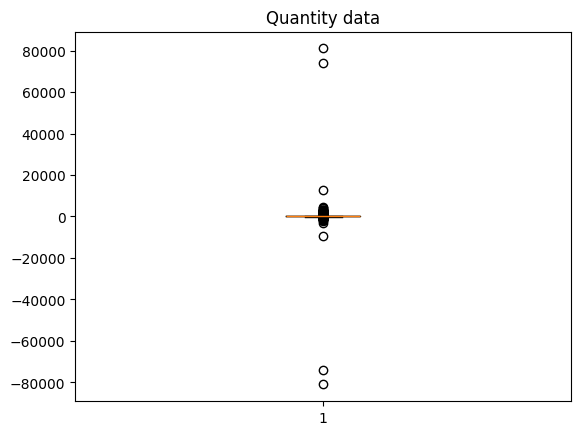

In [94]:
#Get 
plt.figure()
plt.boxplot(original['Quantity'])
plt.title('Quantity data')
plt.show()

Negative data values can be observed in quantity, so we will check what it is about.

In [70]:
df_negative_quantity = original[original['Quantity'] < 0]
df_negative_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


According to the documentation, when the data in InvoiceNo starts with "C," it means that the orders are canceled. Therefore, we will verify if this applies to all records.

In [68]:
#Verifying that all data starts with "C"
starts_with_c = df_negative_quantity['InvoiceNo'].str.startswith('C')
print(f'All data starts with C: {starts_with_c.all()}')
print(f'All data starts with C: {starts_with_c.sum()}')

All data starts with C: True
All data starts with C: 8905


In [71]:
#Filtering data from original data frame which starts with "C"
starts_with_c_original = original['InvoiceNo'].str.startswith('C')
filtered = original[starts_with_c_original]
print(f'All data starts with C: {starts_with_c_original.all()}')
print(f'All data starts with C: {starts_with_c_original.sum()}')

All data starts with C: False
All data starts with C: 8905


In [73]:
# Verifying if that data is the same
if filtered.equals(df_negative_quantity):
    print("The same data")

The same data



This information will be retained because it can provide insights into customer behavior regarding cancellations, which influences the likelihood of them placing an order in the next 30 days.


The review of outlier values will continue.

In [113]:
original['Z_Score_Quantity'] = stats.zscore(original['Quantity'])
threshold = 20
outliers = original[(original['Z_Score_Quantity'] > threshold) | (original['Z_Score_Quantity'] < -threshold)]

outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Z_Score_Quantity
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,-37.685254
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,298.371565
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-298.468562
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom,50.375103
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,325.634086
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,-325.731083


In [114]:
filtered_df = original[original['CustomerID'] == 15838.0]
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Z_Score_Quantity
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,-37.685254
14269,537476,22379,RECYCLING BAG RETROSPOT,150,12/7/2010 11:26,1.85,15838.0,United Kingdom,0.554654
14270,537476,22381,TOY TIDY PINK POLKADOT,100,12/7/2010 11:26,1.85,15838.0,United Kingdom,0.353603
14271,537476,85099B,JUMBO BAG RED RETROSPOT,300,12/7/2010 11:26,1.65,15838.0,United Kingdom,1.157808
79207,542921,22379,RECYCLING BAG RETROSPOT,100,2/2/2011 7:58,1.85,15838.0,United Kingdom,0.353603
...,...,...,...,...,...,...,...,...,...
506975,579163,22865,HAND WARMER OWL DESIGN,96,11/28/2011 13:59,1.79,15838.0,United Kingdom,0.337519
506976,579163,22633,HAND WARMER UNION JACK,96,11/28/2011 13:59,1.79,15838.0,United Kingdom,0.337519
506977,579163,22759,SET OF 3 NOTEBOOKS IN PARCEL,144,11/28/2011 13:59,1.45,15838.0,United Kingdom,0.530528
506978,579164,22866,HAND WARMER SCOTTY DOG DESIGN,96,11/28/2011 14:00,1.85,15838.0,United Kingdom,0.337519


In [115]:
filtered_df = original[original['CustomerID'] == 13256.0]
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Z_Score_Quantity
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.0,13256.0,United Kingdom,50.375103



> We see two data points that are far from normal, where an order was placed and then canceled within minutes. This would indicate an error or confusion with the order. Therefore, these data points will be removed as they do not reflect typical customer behavior. 

> The order with InvoiceNo equal to C536757 is deleted since it is a cancellation order, which may indicate an error at the time of placing the order, as there is no initial order.

> The order with InvoiceNo 578841 will be retained since there is no cancellation order, and upon reviewing the product, it appears to be a quantity that could be expected.

In [118]:
invoice_list = ['C536757','541431','C541433','581483','C581484']
original = original[~original['InvoiceNo'].isin(invoice_list) ]
original.describe()

,Quantity,UnitPrice,CustomerID,Z_Score_Quantity
count,406824.000000,406824.000000,406824.000000,406824.000000
mean,12.084459,3.460498,15287.697985,0.000093
std,48.009952,69.315587,1713.596279,0.193049
min,-3114.000000,0.000000,12347.000000,-12.569958
25%,2.000000,1.250000,13953.000000,-0.040457
50%,5.000000,1.950000,15152.000000,-0.028394
75%,12.000000,3.750000,16791.000000,-0.000247
max,12540.000000,38970.000000,18287.000000,50.375103
